In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [53]:
# scale 변환
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
scaler.fit(X)

x_scaled = scaler.transform(X)

# PCA

In [54]:
# 주성분 분석으로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # n_components = 주성분의 개수
pca.fit(x_scaled)

x_scaled_pca = pca.transform(x_scaled)

print(f'PCA 변환을 하기 전 데이터의 Shape은 {x_scaled.shape}입니다.')
print(f'PCA 변환을 하기 후 데이터의 Shape은 {x_scaled_pca.shape}입니다.')

PCA 변환을 하기 전 데이터의 Shape은 (569, 30)입니다.
PCA 변환을 하기 후 데이터의 Shape은 (569, 2)입니다.


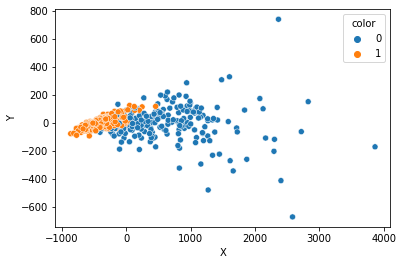

In [55]:
# 칼럼이름을 X,Y로 지정을하고 주성분 변환이 된 데이터들을 데이터 프레임으로 생성
df = pd.DataFrame(x_scaled_pca, columns = ['X', 'Y']) 

# 양성과 악성의 색상을 구분하기 위해 y데이터 들을 color 이름의 칼럼에 넣습니다.
df['color'] = y
import seaborn as sns

# scatterplot을 그립니다.
sns.scatterplot(data = df, x = 'X', y = 'Y', hue = 'color')

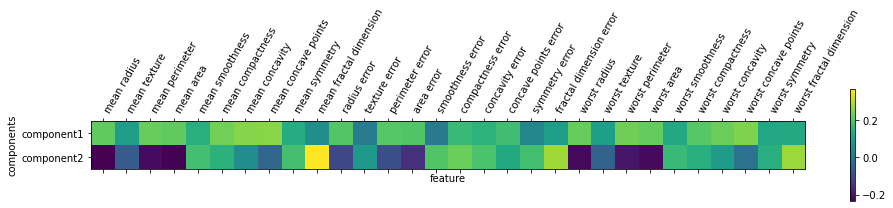

In [40]:
import matplotlib.pyplot as plt
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['component1', 'component2'])
plt.colorbar()
plt.xticks(range(len(X.columns)),
          X.columns, rotation = 60, ha = 'left')
plt.xlabel('feature')
plt.ylabel('components')
plt.show()

# 군집

## k-means

In [72]:
# 중심이 5개인 임의의 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [70]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(200, 2)
(200,)


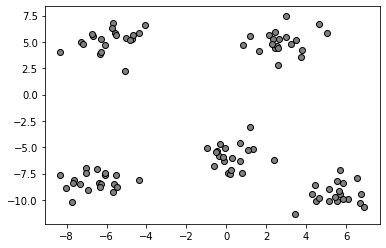

In [76]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [83]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters = 5, random_state = 0)
kmc.fit(X)

label_kmc = kmc.labels_
print(label_kmc)

[3 1 0 2 4 3 3 0 4 3 0 3 4 2 4 3 1 2 4 3 3 2 1 0 3 3 2 4 0 1 2 2 4 2 3 4 0
 2 0 1 2 2 2 4 0 0 3 4 1 4 1 4 3 0 4 4 2 1 2 0 4 1 1 2 3 1 4 1 4 0 0 3 1 4
 2 2 0 1 3 3 4 4 1 2 1 0 2 0 2 0 1 0 3 1 1 1 0 3 3 0]


In [84]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,3
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,0
3,-0.952769,-5.034316,2,2
4,6.550104,-7.912339,0,4


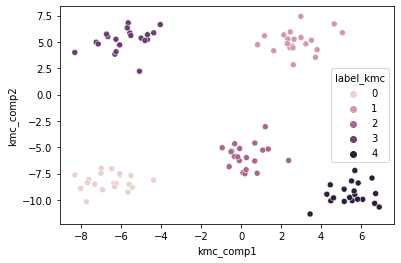

In [87]:
import seaborn as sns
sns.scatterplot(data = X_kmc_df, x = 'kmc_comp1', y = 'kmc_comp2', hue = 'label_kmc')

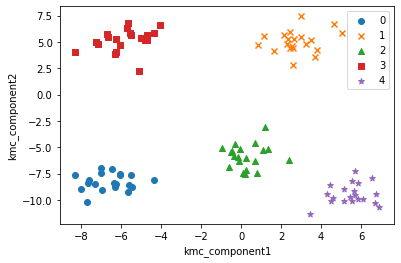

In [85]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

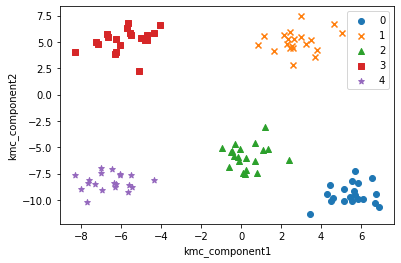

In [86]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

# iris data를 활용해서 k-means clustering 수행하기

In [99]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
Y = pd.DataFrame(iris_data.target, columns = ['class'])

# 4시 35분 까지
# 1. 스케일 변환
scaler = StandardScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)
print(f'스케일 변환 뒤 데이터 모양 : {scaled_X.shape}')
# 2. 스케일 변환 된 것을 주성분 분석으로 2차원으로 수정
pca = PCA(n_components=2)
pca.fit(scaled_X)

pca_X = pca.transform(scaled_X)
print(f'주성분 분석을 활용한 차원 축소 후 데이터 모양 : {pca_X.shape}')

# 3. 주성분 분석으로 2차원 변환 된 것을 k-means clustering을 활용해서 군집을 3개 생성
kms = KMeans(n_clusters=3)
kms.fit(pca_X)
print(f'k-means clustering 결과 : {kms.labels_.shape}개 데이터 생성')

# 4. 실제 real data와 군집으로 생성 된 label 비교
df = pd.DataFrame(pca_X, columns=['component1', 'component2'])
df['target'] = Y
df['kmeans_labels'] = kms.labels_
print(f"실제 클러스터의 군집 이름 : {df['target'].unique()}")
print(f"k-means 클러스터의 군집 이름 : {df['kmeans_labels'].unique()}")

스케일 변환 뒤 데이터 모양 : (150, 4)
주성분 분석을 활용한 차원 축소 후 데이터 모양 : (150, 2)
k-means clustering 결과 : (150,)개 데이터 생성
실제 클러스터의 군집 이름 : [0 1 2]
k-means 클러스터의 군집 이름 : [0 2 1]


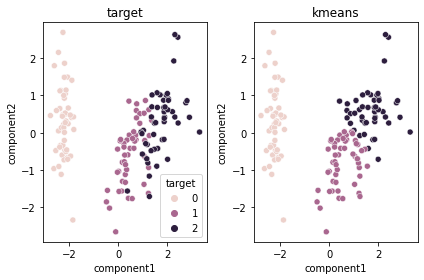

In [109]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(
    data = df, x = 'component1', y = 'component2', hue = 'target', ax = axes[0]
    ).set(title='target')
sns.scatterplot(
    data = df, x = 'component1', y = 'component2', hue = 'kmeans_labels' , ax = axes[1]
    ).set(title='kmeans')
fig.tight_layout()
plt.legend([],[], frameon=False)

[Text(0.5, 1.0, 'kmeans')]

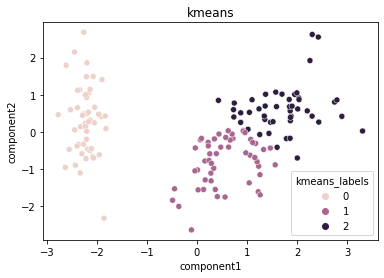

## DBSCAN

In [110]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
                 noise=0.05 ,
                 random_state=0)

In [112]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(300, 2)
(300,)


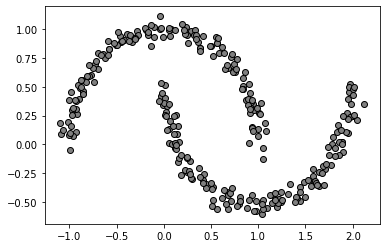

In [113]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [131]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(min_samples = 5, eps=0.2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [132]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [133]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


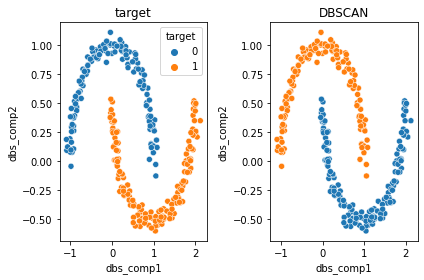

In [134]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'target', ax = axes[0]
    ).set(title='target')
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'label_dbs', ax = axes[1]
    ).set(title='DBSCAN')
fig.tight_layout()
plt.legend([],[], frameon=False)

## DBSCAN

In [135]:
# 35분 까지 아래의 데이터를 가지고 DBSCAN 군집을 생성해보세요!
# 중심이 5개인 임의의 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [145]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(min_samples = 3, eps=2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[ 0  1  2  3  4  0  0  2  4  0  2  0  4  3  4  0  1  3  4  0  0  3  1  2
  0  0  3  4  2  1  3  3  4  3  0  4  2  3  2  1  3  3  3  4  2  2  0  4
  1  4  1  4  0  2  4  4  3  1  3  2  4  1  1  3  0  1  4  1  4  2  2  0
  1  4  3  3  2  1  0  0  4  4  1  3  1  2  3  2  3  2  1  2  0  1  1  1
  2  0 -1  2]


In [146]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,-5.577854,5.872988,3,0
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,2
3,-0.952769,-5.034316,2,3
4,6.550104,-7.912339,0,4


In [147]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, -1}


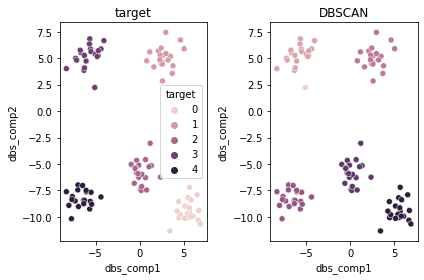

In [148]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'target', ax = axes[0]
    ).set(title='target')
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'label_dbs', ax = axes[1]
    ).set(title='DBSCAN')
fig.tight_layout()
plt.legend([],[], frameon=False)

In [149]:
import plotly.express as px
X_dbs_df['label_dbs'] = X_dbs_df['label_dbs'].astype(str)
fig = px.scatter(X_dbs_df, x="dbs_comp1", y="dbs_comp2", color='label_dbs')
fig.show()